In [6]:
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
foodDataDF = pd.read_csv('https://raw.githubusercontent.com/braincomputingsantosh/Data/master/chipotle.tsv.txt', sep='\t')

In [8]:
foodDataDF.head() # This gets the first 5 rows from the dataframe

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [9]:
# How much data is in this dataframe
# What is the number of observations in the dataset?
foodDataDF.shape[0]

4622

In [10]:
# What is the number of columns in the dataset?
foodDataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [11]:
# Which was the most ordered item?
c = foodDataDF.groupby('item_name')
c = c.sum()
c = c.sort_values(['quantity'], ascending=False)
c.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


In [12]:
foodDataDF.item_price.dtype

dtype('O')

In [18]:
# Brain Dump on Lambda functions
# Lambda functions are also called as anonymous functions
# Write a non-lambda function
def double(x):
    return x * 2

# double(2)
# We will re-write the above function as lambda function
# Syntax: lambda arguments: expression
double = lambda x : x * 2
double(2)

4

In [21]:
# Apply Lambda Function to remove Dollar sign
dollarizer = lambda x : float(x[1:-1])
dollarizer('$2.39')

2.3

In [22]:
foodDataDF.item_price = foodDataDF.item_price.apply(dollarizer)
foodDataDF.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [23]:
foodDataDF.item_price.dtype

dtype('float64')

## Create a histogram of the top 5 items bought

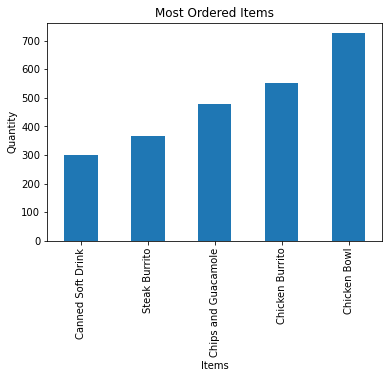

In [32]:
# Get the series of the frames
x = foodDataDF.item_name

# Use the counter class from collections to create a dictionary with keys(text) and frequency
letter_counts = collections.Counter(x)
#letter_counts

# Convert this dictionary to a DataFrame
df = pd.DataFrame.from_dict(letter_counts, orient='index')
# df.head(100)

# Sort the values from the top to the least value
df = df[0].sort_values(ascending=True)[45:50]
# df.head(100)
df.plot(kind='bar')

plt.xlabel('Items')
plt.ylabel('Quantity')
plt.title('Most Ordered Items')

# Show the plot
plt.show()

## Create a ScatterPlot with the number of items ordered per price

(0.0, 36.7)

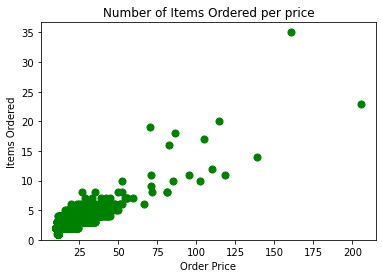

In [34]:
# Group by the orders and sum
orders = foodDataDF.groupby('order_id').sum()

# orders.head()
plt.scatter(x = orders.item_price, y = orders.quantity, s=50, c='green')

# Label
plt.xlabel('Order Price')
plt.ylabel('Items Ordered')
plt.title('Number of Items Ordered per price')
plt.ylim(0)